In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader

from typing import Optional

In [2]:
plt.style.use('dark_background')

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "CPU"

In [7]:
def MNIST_loaders(train_batch_size=50000, test_batch_size=10000):
    transform = Compose([
        ToTensor(),
        # Normalize((0.1307,), (0.3081,))
    ])

    train_loader = DataLoader(
        MNIST('./data/', train=True,
              download=True,
              transform=transform),
        batch_size=train_batch_size, shuffle=True)

    test_loader = DataLoader(
        MNIST('./data/', train=False,
              download=True,
              transform=transform),
        batch_size=test_batch_size, shuffle=False)

    return train_loader, test_loader

def disp(im: torch.Tensor):
    plt.imshow(im.cpu().detach().numpy().transpose((1, 2, 0)), cmap="gray")
    plt.show()

torch.manual_seed(1234)
train_loader, test_loader = MNIST_loaders()

train_data, train_label = next(iter(train_loader))
test_data, test_label = next(iter(test_loader))

In [5]:
class Eye:
    def __init__(self, canvas_size=(28, 28)):
        self.canvas_size = canvas_size
        self.canvas: Optional[torch.Tensor] = None

        self.initialize_canvas()

    def initialize_canvas(self):
        self.canvas = torch.zeros(self.canvas_size, device=DEVICE).unsqueeze(0)

    def show_canvas(self):
        plt.imshow(self.canvas.cpu().detach().numpy().transpose((1, 2, 0)), cmap="gray")
        plt.show()

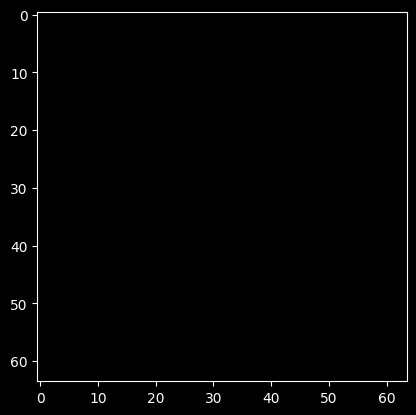

In [6]:
e = Eye()
e.show_canvas()

In [37]:
train_data[0].shape, (train_data[0] * (train_data[0] > 0.5)).shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

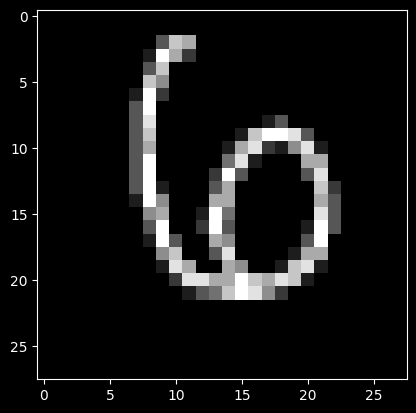

In [43]:
disp(train_data[0])

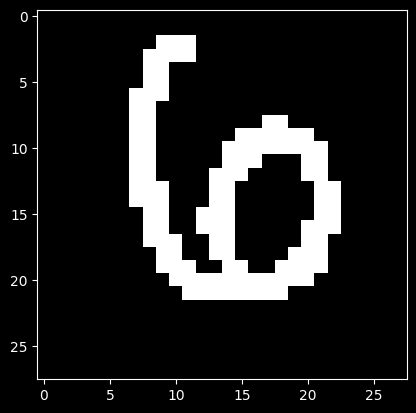

In [44]:
disp(train_data[0] > 0)